# Linear Regression

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [53]:
np.random.seed(42)

# Generate 230 random values for the independent variable (X)
X = np.random.rand(230, 1)

y = 3 * X + 5 + np.random.randn(230, 1) * 0.5

data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Display the first few rows of the DataFrame
data.head()

,X,y
0,0.374540,6.130121
1,0.950714,8.578910
2,0.731994,7.063653
3,0.598658,8.156060
4,0.156019,5.780890


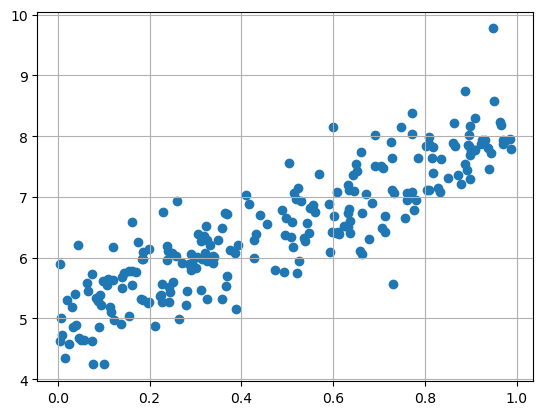

In [54]:
plt.scatter(data.X,data.y)
plt.grid(True)
plt.show()

In [55]:
linear_reg = LinearRegression()

x = data.X.values.reshape(-1,1) # convert to numpy array using reshape()
y = data.y.values.reshape(-1,1)

linear_reg.fit(x,y)

LinearRegression()

In [56]:
# finding the intersection with y axis
y_axis_inter = np.array([0]).reshape(1,-1)
b0 = linear_reg.predict(y_axis_inter)
print("b0: ",b0)

b0:  [[4.98331179]]


In [57]:
b0_ = linear_reg.intercept_ # another way to calculate y axis intersection
print("b0_:",b0_)

b0_: [4.98331179]


In [58]:
# finding the coefficient or [slope]
b1 = linear_reg.coef_
print("b1:",b1)

b1: [[3.10208975]]


In [59]:
# so the linear regression function is : Y = 3.102 * x + 4.983

In [25]:
# Lets try an x value with using manual function
x_val = 2.7
new_Y = 3.102 * x_val + 4.983 
print(new_Y)

# or using predict()
new_Y_predict = linear_reg.predict(np.array([x_val]).reshape(1,-1))
print("Predicted new_Y:",new_Y_predict)

13.3584
Predicted new_Y: [[13.35895412]]


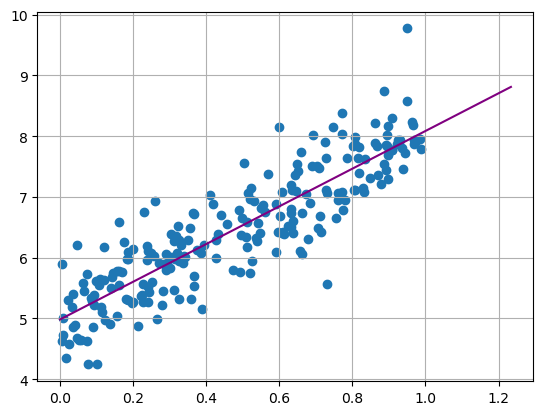

In [60]:
# Now Testing, Predict and Vizualisation using LinReg
array = np.array([0,0.2,0.3,0.5,0.6,0.8,0.9,1.1,1.2,1.21,1.22,
                  1.23,1.234]).reshape(-1,1)

plt.figure()
plt.scatter(x,y)

y_head = linear_reg.predict(array)

plt.plot(array,y_head,color="purple")
plt.grid(True)
plt.show()

# Multiple Linear Regression

In [61]:
# Generate 230 random values for two independent variables (X1 and X2)
X1 = np.random.rand(230, 1)
X2 = np.random.rand(230, 1)

# Generate the dependent variable (y) with a linear relationship
# y = 4*X1 + 2*X2 + 7 + some noise
y = 4 * X1 + 2 * X2 + 7 + np.random.randn(230, 1) * 0.5

# Create a DataFrame
data_multi = pd.DataFrame(np.hstack((X1, X2, y)), columns=['X1', 'X2', 'y'])

# Display the first few rows of the DataFrame
data_multi.head()


,X1,X2,y
0,0.450544,0.342082,9.449123
1,0.129159,0.821257,9.469488
2,0.954051,0.110632,11.126318
3,0.606175,0.846452,10.449931
4,0.228643,0.127489,8.359647


In [28]:
independent = data_multi[["X1","X2"]].values
independent

array([[0.45054414, 0.34208175],
       [0.12915942, 0.8212573 ],
       [0.95405103, 0.11063174],
       [0.60617463, 0.84645229],
       [0.22864281, 0.12748866],
       [0.67170068, 0.39728729],
       [0.61812824, 0.79729537],
       [0.35816272, 0.14991743],
       [0.11355759, 0.2292514 ],
       [0.6715732 , 0.72225257],
       [0.5203077 , 0.72003654],
       [0.77231839, 0.64114763],
       [0.5201635 , 0.69394844],
       [0.8521815 , 0.54272444],
       [0.55190684, 0.25179906],
       [0.56093797, 0.34569599],
       [0.8766536 , 0.18159772],
       [0.40348287, 0.90845056],
       [0.13401523, 0.58339179],
       [0.02878268, 0.40085142],
       [0.75513726, 0.4620058 ],
       [0.62030955, 0.94728334],
       [0.70407977, 0.1533514 ],
       [0.21296416, 0.58622983],
       [0.13637148, 0.50588868],
       [0.01454467, 0.61145424],
       [0.35058756, 0.01811018],
       [0.58991769, 0.87212391],
       [0.39224405, 0.93211828],
       [0.43747492, 0.56513318],
       [0.

In [29]:
dependent = data_multi.y.values.reshape(-1,1)
dependent

array([[ 9.44912332],
       [ 9.46948832],
       [11.12631808],
       [10.44993094],
       [ 8.35964747],
       [10.78667019],
       [11.34699892],
       [ 9.27287609],
       [ 8.32969424],
       [11.36038796],
       [10.48622102],
       [10.54108837],
       [10.68336   ],
       [11.59801873],
       [ 9.84701489],
       [ 9.29676959],
       [10.32928157],
       [10.95740901],
       [ 8.68306693],
       [ 8.25758389],
       [10.95871982],
       [11.39068295],
       [10.59216378],
       [ 8.76629395],
       [ 8.60532365],
       [ 8.04994949],
       [ 8.22132249],
       [10.9493325 ],
       [10.54427963],
       [ 9.64079174],
       [12.63781449],
       [ 9.79071698],
       [10.3769994 ],
       [10.21982461],
       [10.46223679],
       [10.80005428],
       [11.81363845],
       [11.52819078],
       [ 9.59055309],
       [13.00230292],
       [ 9.91128591],
       [ 8.79219383],
       [10.5475812 ],
       [13.30260019],
       [10.3692468 ],
       [ 9

In [62]:
# MLR training
Multi_Lr = LinearRegression()
Multi_Lr.fit(independent,dependent)

LinearRegression()

In [63]:
# test 1 
data_test = np.array([[0.66,1.23]])
test_result = Multi_Lr.predict(data_test)
test_result

array([[12.1476958]])

In [64]:
# test 2
data_test2 = np.array([[3.26,11.42]])
test_result2 = Multi_Lr.predict(data_test2)
test_result2

array([[42.63565683]])

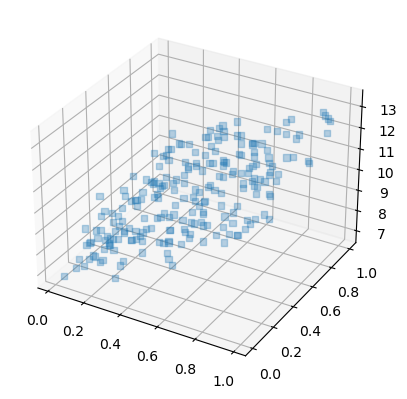

In [65]:
ax = plt.axes(projection = "3d")
ax.scatter(data_multi["X1"],data_multi["X2"],data_multi["y"],
           marker="s",alpha=0.3)
plt.show()

# Polynomial Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
X = np.random.rand(130, 1)

# Generate the dependent variable (y) with a polynomial relationship
# y = 3*X^2 + 2*X + 5 + some noise
y = 3 * (X*3)**4 + (2 * X)**2 + 5 + np.random.rand(130, 1) * 4

# Create a DataFrame
data_poly = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Display the first few rows of the DataFrame
data_poly.head()

,X,y
0,0.339450,9.494662
1,0.814825,117.467845
2,0.080115,8.915332
3,0.894817,164.369443
4,0.547592,30.739053


In [69]:
data_poly = data_poly.sort_values("X")
new_y = data_poly.y.values.reshape(-1,1)
new_x = data_poly.X.values.reshape(-1,1)

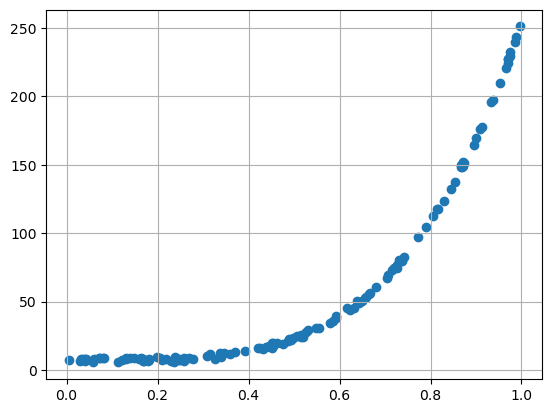

In [70]:
plt.scatter(new_x,new_y)
plt.grid(True)
plt.show()

In [71]:
lr = LinearRegression()
lr.fit(new_x,new_y)

LinearRegression()

In [72]:
y_predict = lr.predict(new_x)

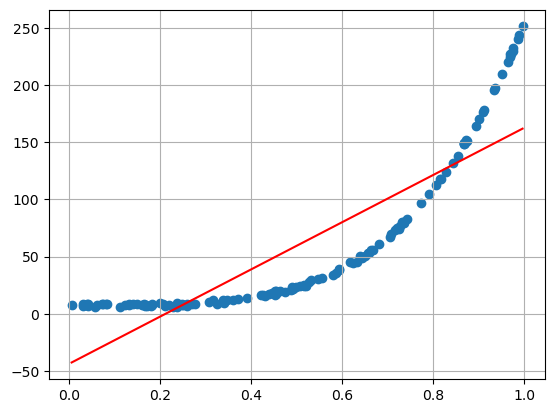

In [73]:
plt.scatter(new_x,new_y)
plt.plot(new_x,y_predict,color="red")
plt.grid(True)
plt.show()

In [74]:
test_x = 1.4  
print(lr.predict((np.array([test_x]).reshape(1,-1)))) # such a wrong value

[[244.98102412]]


In [75]:
# polynomial regression = b0 + b1*x + b2*x^2 + ... bn*x^n

poly_reg = PolynomialFeatures(degree=3)

x_poly = poly_reg.fit_transform(new_x)
x_poly

array([[1.00000000e+00, 4.93998093e-03, 2.44034116e-05, 1.20552388e-07],
       [1.00000000e+00, 2.99735899e-02, 8.98416090e-04, 2.69287554e-05],
       [1.00000000e+00, 3.06525022e-02, 9.39575891e-04, 2.88003521e-05],
       [1.00000000e+00, 3.66714269e-02, 1.34479355e-03, 4.93154985e-05],
       [1.00000000e+00, 3.93435407e-02, 1.54791419e-03, 6.09004250e-05],
       [1.00000000e+00, 4.01091914e-02, 1.60874724e-03, 6.45255508e-05],
       [1.00000000e+00, 4.15728591e-02, 1.72830261e-03, 7.18504808e-05],
       [1.00000000e+00, 5.70868561e-02, 3.25890914e-03, 1.86040877e-04],
       [1.00000000e+00, 6.03520840e-02, 3.64237404e-03, 2.19824864e-04],
       [1.00000000e+00, 7.21984090e-02, 5.21261026e-03, 3.76342167e-04],
       [1.00000000e+00, 7.34967473e-02, 5.40177187e-03, 3.97012662e-04],
       [1.00000000e+00, 8.01148464e-02, 6.41838861e-03, 5.14208218e-04],
       [1.00000000e+00, 8.16299820e-02, 6.66345397e-03, 5.43937628e-04],
       [1.00000000e+00, 1.11919619e-01, 1.25260012e

In [76]:
lr2 = LinearRegression()
lr2.fit(x_poly,new_y)

LinearRegression()

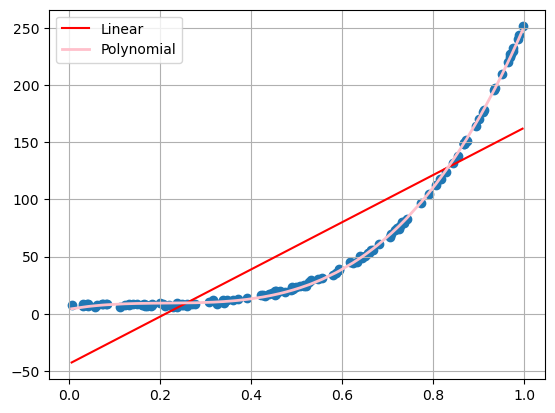

In [77]:
y_predict2 = lr2.predict(x_poly)

plt.scatter(new_x,new_y)
plt.plot(new_x,y_predict,color="red",label="Linear")
plt.plot(new_x,y_predict2,color="pink",label="Polynomial",linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

In [78]:
from sklearn.metrics import r2_score

In [79]:
print("Linear r^2 score: {}".format(r2_score(new_y,y_predict)))
print("Polynomial r^2 score: {}".format(r2_score(new_y,y_predict2)))

Linear r^2 score: 0.7581752246410687
Polynomial r^2 score: 0.9994709187245282


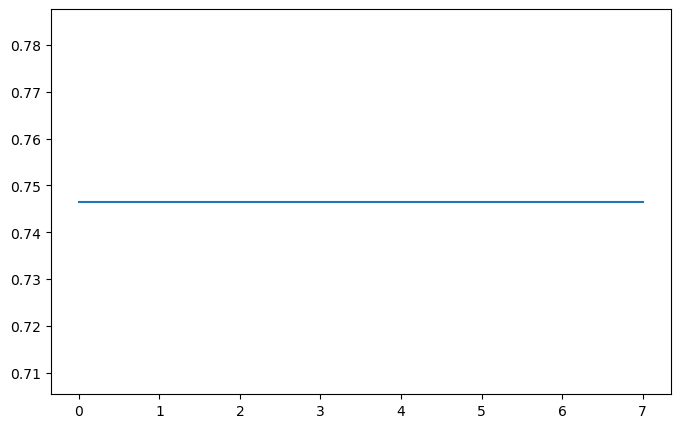

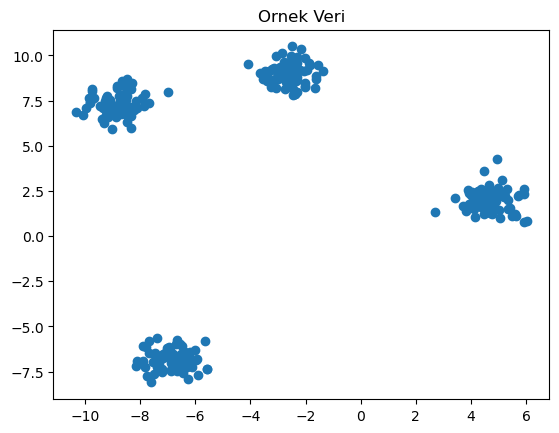

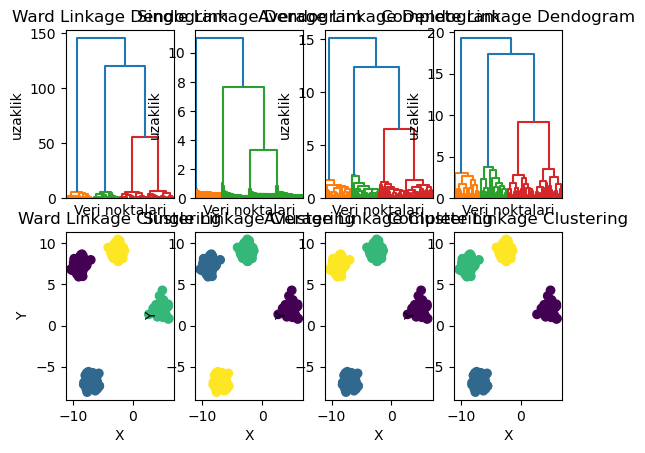

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

X,_= make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

plt. figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Ornek Veri")

linkage_methods = ["ward", "single", "average", "complete"]

plt. figure()
for i, linkage_method in enumerate(linkage_methods, 1):

    model = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    cluster_labels = model. fit_predict(X)

    plt.subplot(2, 4, i)
    plt.title(f"{linkage_method.capitalize()} Linkage Dendogram")
    dendrogram(linkage(X, method = linkage_method), no_labels = True)
    plt.xlabel("Veri noktalari")
    plt.ylabel("uzaklik")

    plt.subplot(2, 4, i +4)
    plt.scatter(X[:, 0], X[:, 1], c = cluster_labels, cmap = "viridis")
    plt.title(f"{linkage_method.capitalize()} Linkage Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")

In [2]:
# RANDOM FOREST REGRESSOR PRACTICE
import seaborn as sns
import pandas as pd
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
health = sns.load_dataset("healthexp")
health.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
health = pd.get_dummies(health)

In [ ]:
# Import necessary libraries and functions from scikit-learn

from sklearn.model_selection import train_test_split
# train_test_split is used to split the dataset into training and testing sets.

from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor is the regression version of the Random Forest algorithm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
""" 
These are performance metrics used to evaluate the performance of the 
regression model.
mean_absolute_error: Average of absolute differences between predicted and 
actual values.
mean_squared_error: Average of squared differences between predicted and 
actual values.
r2_score: Coefficient of determination, a statistical measure of how well 
the regression line approximates the real data points.
"""
from sklearn.model_selection import GridSearchCV
# GridSearchCV is used for hyperparameter tuning. It performs an exhaustive 
# search over specified parameter values for an estimator/model.

In [11]:
X = health.drop(["Life_Expectancy"],axis=1)

In [12]:
y = health["Life_Expectancy"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                    y, test_size=0.2, random_state=19)

In [48]:
rfr = RandomForestRegressor(random_state=13)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

In [49]:
M_abb_err = mean_absolute_error(y_pred, y_test)
print("mean_absolute_error:",M_abb_err)

0.25916363636361917

In [50]:
M_squ_err = mean_squared_error(y_pred, y_test)
print("mean_squared_error:",M_squ_err)

0.10221141818181628

In [51]:
r2_score = r2_score(y_pred, y_test)
print("r2_score:", r2_score)

0.9905128030154042

In [57]:
param_grid = {
'n_estimators': [100, 200, 400],
'max_depth': [10, 20, 30],
'min_samples_split':[2, 5, 10],
'min_samples_leaf': [1, 2, 4] }


rfr_cv = GridSearchCV(estimator=rfr, 
                      param_grid=param_grid, cv = 3, 
                      scoring = "neg_mean_squared_log_error")


In [58]:
rfr_cv.fit(X_train,y_train)
y_pred = rfr_cv.predict(X_test)

In [59]:
mean_absolute_error(y_pred, y_test)

0.2517136363637103

In [60]:
mean_squared_error(y_pred, y_test)

0.09590485795455878

In [61]:
r2_score(y_pred, y_test)

0.9911553539383788

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

df=pd.read_csv()
X=df [['age', 'income' , 'vote' ] ]
y=df ['educate' ]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size = 0.3, random_state=0)

clf=KNeighborsRegressor(12)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

param_grid = {"n_neighbors":[1,5,7,10],
              "weights":["uniform","distance"],
              "algorithm":["auto","ball_tree","kd_tree","brute"]}

clf_cv = GridSearchCV(estimator=clf, 
                      param_grid=param_grid, cv = 3, 
                      scoring = "neg_mean_squared_log_error")
clf_cv.fit(X_train,y_train)
y_pred = clf_cv.predict(X_test)
print(r2_score(y_pred, y_test))

9.292149884259258
-1.2555631609237783
